# Fibre2u Pricing Problem

Description: Similar to the Phane Pricing Problem I recently did, I am bothered by pricing strategies that are not internally consistent. I came across an advertisement for unlimited internet sold by fibre2usolutions in Botswana at different speeds. They have the following (speed, price) pairs: $(5\text{Mbps}, \text{BWP}450)$, $(10\text{Mbps}, \text{BWP}840)$, $(25\text{Mbps}, \text{BWP}1030)$, and $(50\text{Mbps}, \text{BWP}1950)$. With the Phane problem, the inconsistency came from the last price being an outlier. In this case, there is no clear outlier but the pricing strategy is still internally inconsistent. 

A key assumption I am going to make is that the business wants to price discriminate in such a way that eliminates the consumer surplus. This problem is different from the Phane problem in two significant ways: first the product itself is unlimited and the different bundle options are non-additive. This means if I wanted an internet with 10Mbps speed, I cannot achieve that by buying two 5Mbps subscriptions. The question this brief analysis will attempt to ask is how should fibre2usolutions price its different packages such that their pricing strategy is internally consistent? 

This write-up is intended to demonstrate how I think through solving a problem and is therefore not intended as a report or presentation to an audience, especially a non-technical one. If I have more time down the road, I might consider creating a presentation for a non-technical audience of this analysis. 

In [58]:
import pandas as pd # For dataframe manipulations
import numpy as np # For basic numerical algebra stuff
import matplotlib.pyplot as plt # for plots
from sklearn.linear_model import LinearRegression # For fitting Linear Models
from scipy.optimize import curve_fit # For fitting an Exponential Model

The first step is to store the (speed, price) pairs in a data frame. 

In [59]:
df = pd.DataFrame(data={'Internet Speed in Mbps': [5, 10, 25, 50], 'Bundle Price in BWP': [450, 840, 1030, 1950]})
df['Price per Mbps in BWP'] = df['Bundle Price in BWP']/df['Internet Speed in Mbps']
df

,Internet Speed in Mbps,Bundle Price in BWP,Price per Mbps in BWP
0,5,450,90.0
1,10,840,84.0
2,25,1030,41.2
3,50,1950,39.0


Next I plot the data in the dataframe to confirm my suspicion that the pricing strategy is not internally consistent.

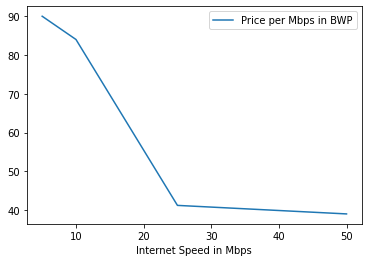

In [60]:
df.plot(x = 'Internet Speed in Mbps', y = 'Price per Mbps in BWP', kind = 'line')
plt.show()

From our plot, we notice that as the speed increases, the price per Mbps decreases. In that sense, my suspicion that the pricing strategy is not internally consistent is wrong. The prices are behaving as one would expect. However, we can observe from the plot that the change in price per Mbps is not prortional at different speeds. What if we fit a Linear Regression model such that the decrease in price per Mbps as speed increase is linear?

In [61]:
model = LinearRegression()
model.fit(df.iloc[0:4, 0].values.reshape(-1, 1), df.iloc[0:4, 2].values.reshape(-1, 1))
preds = model.predict([[5],[10],[25],[50]]) # Note to self: Scalability

I predict new prices for all the bundles based on the Linear Model we fitted. I add them to our data frame. 

In [62]:
df['LM Prices per Mbps in BWP'] = [preds[i,0] for i in range(4)]
df

,Internet Speed in Mbps,Bundle Price in BWP,Price per Mbps in BWP,LM Prices per Mbps in BWP
0,5,450,90.0,84.257143
1,10,840,84.0,78.340816
2,25,1030,41.2,60.591837
3,50,1950,39.0,31.010204


For comparison, I plot the predicted prices alongside the original prices. 

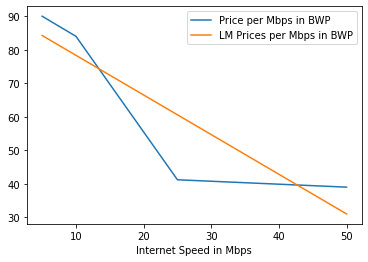

In [63]:
df.plot(x = 'Internet Speed in Mbps', y = ['Price per Mbps in BWP', 'LM Prices per Mbps in BWP'], kind = 'line')
plt.show()

Next we consider an exponential fit on the data. 

In [64]:
def exponential(x,a,b):
    return a*np.exp(b*x)

pars, cov = curve_fit(f=exponential, xdata = df['Internet Speed in Mbps'], ydata = df['Price per Mbps in BWP'],p0=[0, 0], bounds=(-np.inf, np.inf))
pars
df['EM Prices per Mbps in BWP'] = pars[0]*np.exp(pars[1]*df['Internet Speed in Mbps'])
df

,Internet Speed in Mbps,Bundle Price in BWP,Price per Mbps in BWP,LM Prices per Mbps in BWP,EM Prices per Mbps in BWP
0,5,450,90.0,84.257143,89.378776
1,10,840,84.0,78.340816,79.011775
2,25,1030,41.2,60.591837,54.583836
3,50,1950,39.0,31.010204,29.468031


We add the exponential fit to our plot.

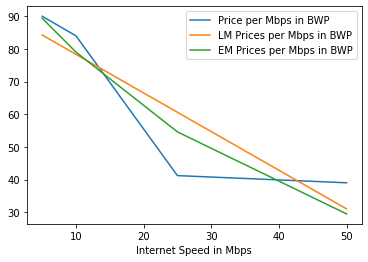

In [65]:
df.plot(x = 'Internet Speed in Mbps', y = ['Price per Mbps in BWP', 'LM Prices per Mbps in BWP','EM Prices per Mbps in BWP'], kind = 'line')
plt.show()

Now we determine the bundle prices if we use each of the pricing strategies recommended by the Linear model and the exponential model.

In [66]:
df['LM Bundle Price'] = df['Internet Speed in Mbps']*df['LM Prices per Mbps in BWP']
df['EM Bundle Price'] = df['Internet Speed in Mbps']*df['EM Prices per Mbps in BWP']
df

,Internet Speed in Mbps,Bundle Price in BWP,Price per Mbps in BWP,LM Prices per Mbps in BWP,EM Prices per Mbps in BWP,LM Bundle Price,EM Bundle Price
0,5,450,90.0,84.257143,89.378776,421.285714,446.893880
1,10,840,84.0,78.340816,79.011775,783.408163,790.117746
2,25,1030,41.2,60.591837,54.583836,1514.795918,1364.595907
3,50,1950,39.0,31.010204,29.468031,1550.510204,1473.401562


We notice that the linear and exponential models significantly reduces the price of the fastest bundle. If we assume the objective of the company is to charge as much as they can for each price point, then they can charge the maximum of the 3 strategies for each internet speed. 

In [67]:
df['Maximum Price'] = df[['Bundle Price in BWP','LM Bundle Price','EM Bundle Price']].max(axis = 1)
df

,Internet Speed in Mbps,Bundle Price in BWP,Price per Mbps in BWP,LM Prices per Mbps in BWP,EM Prices per Mbps in BWP,LM Bundle Price,EM Bundle Price,Maximum Price
0,5,450,90.0,84.257143,89.378776,421.285714,446.893880,450.000000
1,10,840,84.0,78.340816,79.011775,783.408163,790.117746,840.000000
2,25,1030,41.2,60.591837,54.583836,1514.795918,1364.595907,1514.795918
3,50,1950,39.0,31.010204,29.468031,1550.510204,1473.401562,1950.000000


The maximum price suggests that the current pricing strategy works fine, but that they can charge even more for the 25Mbps bundle. Whether or not they increase the price of this bundle to BWP1,515 (an almost 50% price increase) depends on the demand function for that particular bundle. Specifically, it depends on how many current subscribers they can expect to churn out. A price increase can be hard to sell, but if they decrease the 5Mbps bundle down to the LM Price, decrease the price of the 10Mbps bundle down to the EM Price, increase the price of the 25Mbps bundle to the EM price, and reduce the price of the 50Mbps to BWP1890. The prices of recommended by the LM and EM models are far too low, hence why I recommend just a small decrease for the big bundle. When annoucing the price changes, the marketing should focus on the price decrease on the 5,10, and 50 Mbps bundle. This way they make the necessary adjustment with minimal damage to the reputation. My guess is some people will stay on even with the price increase, and for those that are unhappy they will simply downgrade to a slower speed. 

In [68]:
df_final = pd.DataFrame()
df_final[['Internet Speed in Mbps', 'Current Price in BWP', 'Price per Mbps in BWP']] = df[['Internet Speed in Mbps', 'Bundle Price in BWP','Price per Mbps in BWP']]
df_final['Recommended Price in BWP'] = [420, 790, 1360, 1890]
df_final['Recommended Price per Mbps in BWP'] = df_final['Recommended Price in BWP']/df_final['Internet Speed in Mbps']
df_final

,Internet Speed in Mbps,Current Price in BWP,Price per Mbps in BWP,Recommended Price in BWP,Recommended Price per Mbps in BWP
0,5,450,90.0,420,84.0
1,10,840,84.0,790,79.0
2,25,1030,41.2,1360,54.4
3,50,1950,39.0,1890,37.8


Disclaimer: The reader should remember that all models are wrong, but some are insightful. 